In [32]:
import pandas as pd
from pandas import set_option
import numpy as np
from numpy import set_printoptions
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

% matplotlib inline
plt.style.use('ggplot')

In [2]:
def get_data (location,names):
    the_data=pd.read_csv(location,usecols=names)
    return the_data

In [3]:
location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\daily_scan_data\consolidated_daily_scan_0.csv'
#location=r'C:\Users\Sharyn\Desktop\Datasets\sandp500\trade_on_conditions_data\consolidated_trade_on_conditions_0.csv'
names=['two_c_ratio','Slope','Slope_rate','Sigma_Spread','HL_Spread','Vol_pct','Daily_Return_ma','RSI','GL_Status']
#names=['Sigma_Spread','HL_Spread','Vol_pct','Daily_Return_ma','GL_Status']
#names=['Daily_Return_ma','RSI','GL_Status',]
#names=['two_c_ratio','Slope','Slope_rate','GL_Status']
num_features=len(names)-1
the_data=get_data(location,names)
#the_data['Slope_rate']=np.where(the_data['Slope_rate']>0,1,0)
#the_data['Slope']=np.where(the_data['Slope']>0,1,0)
#the_data['Daily_Return_ma']=np.where(the_data['Daily_Return_ma']>0,1,0)
#the_data['RSI']=np.where(the_data['RSI']>60,1,0)
set_option('precision',3)
the_data.head()

,Slope,Slope_rate,Sigma_Spread,HL_Spread,Vol_pct,Daily_Return_ma,RSI,two_c_ratio,GL_Status
0,-1.963,-1.691,26.988,9.66,0.798,-0.013,52.178,0.585,0
1,-1.006,0.957,27.006,5.25,-0.346,0.037,52.014,0.575,1
2,1.523,2.529,26.886,5.81,0.149,-0.069,49.008,0.431,1
3,2.684,1.161,26.582,5.61,-0.283,-0.011,52.339,0.610,0
4,2.630,-0.054,26.393,7.93,0.236,-0.037,49.826,0.492,0


In [4]:
num_features

8

In [5]:
the_data.describe()

,Slope,Slope_rate,Sigma_Spread,HL_Spread,Vol_pct,Daily_Return_ma,RSI,two_c_ratio,GL_Status
count,10598.000,1.060e+04,10598.000,10598.000,10598.000,10598.000,10598.000,10598.000,10598.000
mean,0.089,-2.767e-04,9.540,1.719,0.091,0.095,52.603,0.542,0.528
std,1.589,1.009e+00,20.514,3.621,0.534,0.478,12.303,0.327,0.499
min,-24.346,-1.635e+01,0.110,0.030,-0.826,-2.056,9.246,-0.495,0.000
25%,-0.100,-8.100e-02,1.303,0.273,-0.226,-0.164,43.807,0.282,0.000
50%,0.012,-1.000e-03,2.578,0.510,-0.027,0.075,52.683,0.575,1.000
75%,0.148,7.700e-02,5.839,1.150,0.263,0.312,61.489,0.799,1.000
max,21.135,1.433e+01,180.432,85.990,10.703,3.866,88.158,1.525,1.000


In [6]:
the_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10598 entries, 0 to 10597
Data columns (total 9 columns):
Slope              10598 non-null float64
Slope_rate         10598 non-null float64
Sigma_Spread       10598 non-null float64
HL_Spread          10598 non-null float64
Vol_pct            10598 non-null float64
Daily_Return_ma    10598 non-null float64
RSI                10598 non-null float64
two_c_ratio        10598 non-null float64
GL_Status          10598 non-null int64
dtypes: float64(8), int64(1)
memory usage: 745.2 KB


In [7]:
print(the_data.groupby('GL_Status').size())
print((the_data.groupby('GL_Status').size()/len(the_data)*100))

GL_Status
0    5006
1    5592
dtype: int64
GL_Status
0    47.235
1    52.765
dtype: float64


In [8]:
#CORRELATIONS
correlations=the_data.corr(method='pearson')
set_option('display.width',120)
set_option('precision',3)
print (correlations)

                 Slope  Slope_rate  Sigma_Spread  HL_Spread  Vol_pct  Daily_Return_ma    RSI  two_c_ratio  GL_Status
Slope            1.000   3.174e-01         0.147      0.057    0.006            0.171  0.249        0.242 -2.896e-02
Slope_rate       0.317   1.000e+00        -0.007     -0.052   -0.002            0.006  0.033        0.057  6.310e-04
Sigma_Spread     0.147  -7.034e-03         1.000      0.795   -0.022            0.081  0.122        0.070  1.354e-02
HL_Spread        0.057  -5.232e-02         0.795      1.000    0.080            0.011  0.054        0.025  1.243e-02
Vol_pct          0.006  -1.803e-03        -0.022      0.080    1.000            0.022  0.018        0.029 -1.474e-02
Daily_Return_ma  0.171   6.452e-03         0.081      0.011    0.022            1.000  0.793        0.634 -3.029e-02
RSI              0.249   3.267e-02         0.122      0.054    0.018            0.793  1.000        0.874 -4.058e-02
two_c_ratio      0.242   5.748e-02         0.070      0.025    0

In [9]:
#SKEW
skew=the_data.skew()
print(skew)

Slope              0.010
Slope_rate         0.027
Sigma_Spread       4.047
HL_Spread          5.413
Vol_pct            3.521
Daily_Return_ma    0.884
RSI               -0.070
two_c_ratio       -0.173
GL_Status         -0.111
dtype: float64


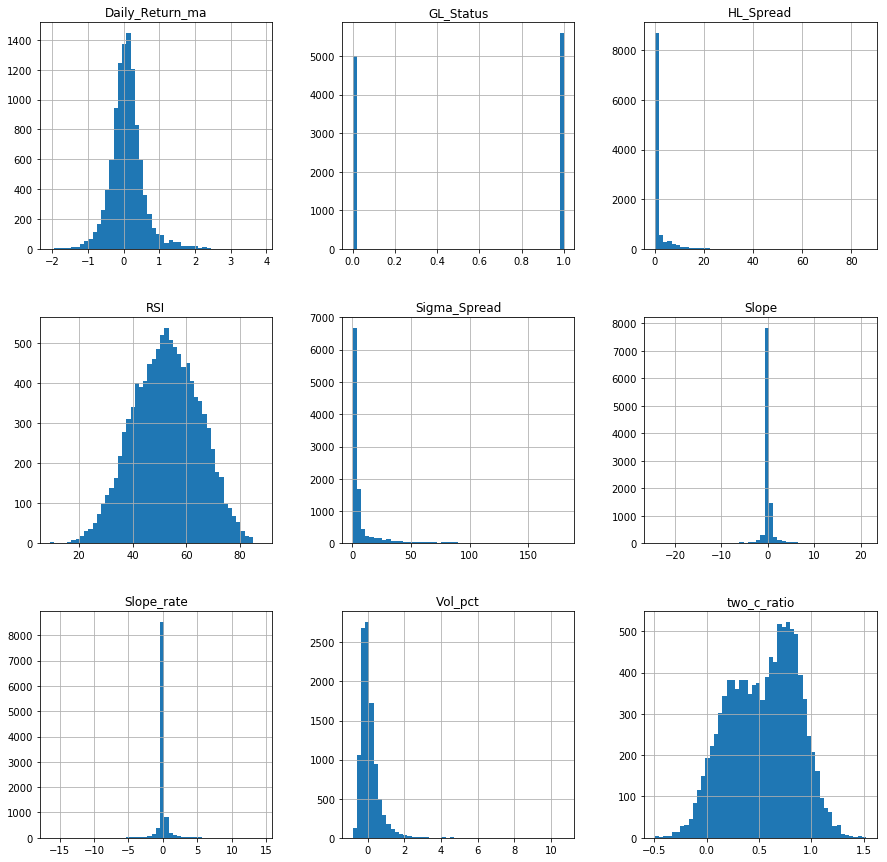

In [10]:
the_data.hist(bins=50,figsize=(15,15))
plt.show()

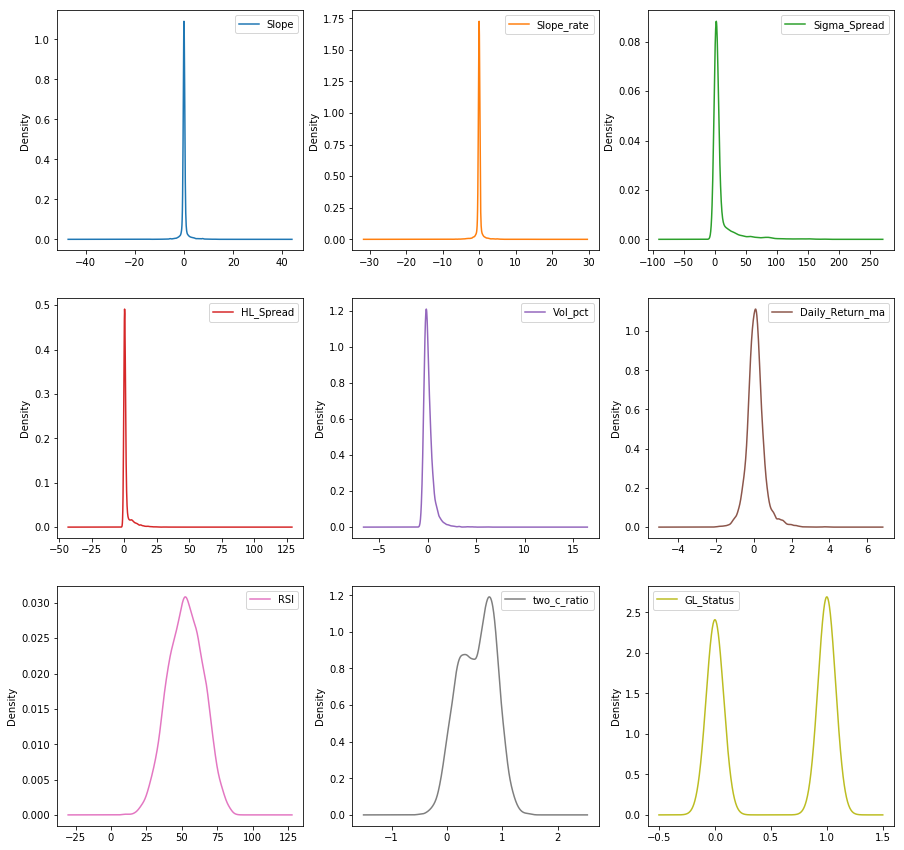

In [11]:
the_data.plot(kind='density',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))
plt.show()

the_data.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(15,15))
plt.show()

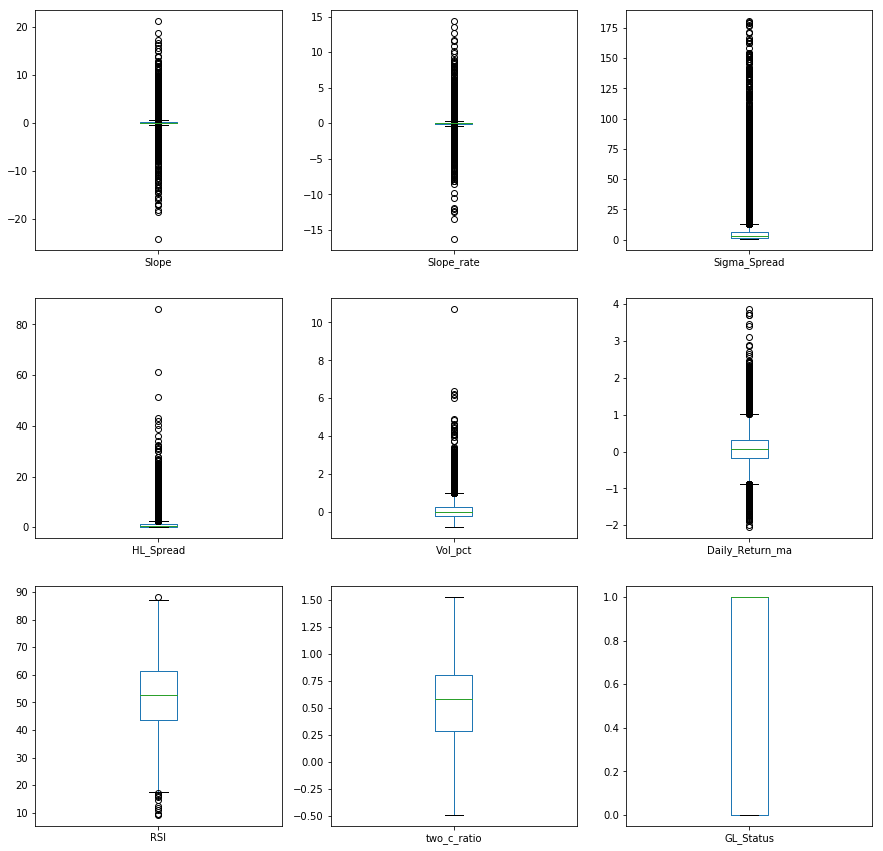

In [12]:
the_data.plot(kind='box',subplots=True,layout=(3,3),sharex=False, sharey=False,figsize=(15,15))
plt.show()

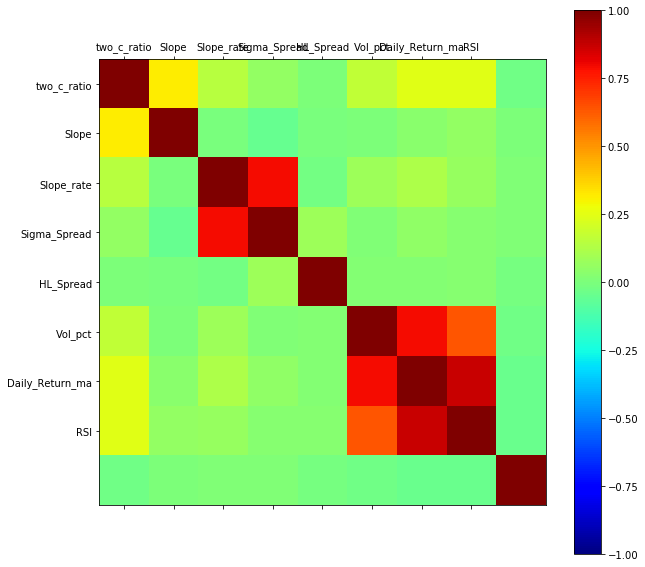

In [13]:
#Correlation Matrix Plot
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,cmap='jet',vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,num_features,1)
ax.set_xticks(ticks=ticks)
ax.set_yticks(ticks=ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

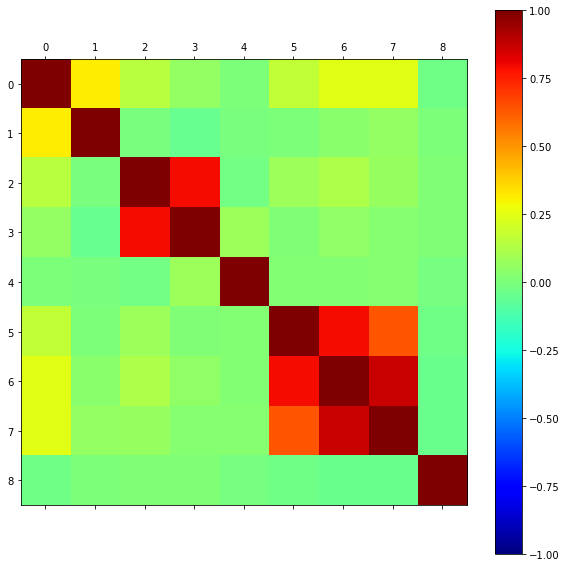

In [14]:
#Correlation Matrix Plot (generic- no ticks and names)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,cmap='jet', vmin=-1,vmax=1)
fig.colorbar(cax)

plt.show()

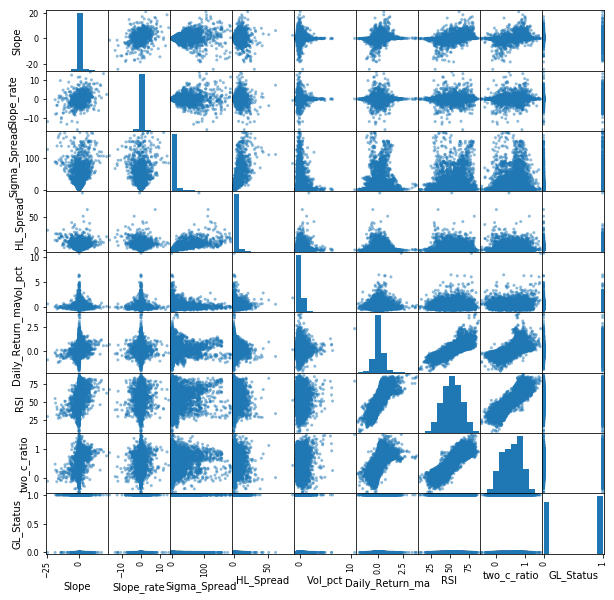

In [15]:
#SCATTER PLOT MATRIX
scatter_matrix(the_data,figsize=(10,10))
plt.show()

In [16]:
#CONVERT DATAFRAME TO AN ARRAY
array=the_data.values
X=array[:,0:num_features]
Y=array[:,num_features]
#RESCALE THE DATA
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.492  0.478  0.149  0.112  0.141  0.345  0.544  0.534]
 [ 0.513  0.564  0.149  0.061  0.042  0.354  0.542  0.53 ]
 [ 0.569  0.615  0.148  0.067  0.085  0.336  0.504  0.459]
 [ 0.594  0.571  0.147  0.065  0.047  0.345  0.546  0.547]
 [ 0.593  0.531  0.146  0.092  0.092  0.341  0.514  0.489]]


In [17]:
#FEATURE EXTRACTION USING CHI-SQUARED
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#feature extraction
test=SelectKBest(score_func=chi2,k=(num_features-1))
# this method would not work until I used the rescaled ( 0 to 1) X data. This method only works with non-negative features.
X_scaled=rescaledX
fit=test.fit(X_scaled,Y)
#summarize scores
set_printoptions(precision=3)
print('feature scores: ',fit.scores_)

features=fit.transform(X_scaled)
print('selected features:\n',features[0:5,:])

feature scores:  [  2.020e-02   8.563e-06   4.811e-01   1.478e-01   6.200e-02   1.746e-01
   7.722e-01   8.323e-01]
selected features:
 [[ 0.492  0.149  0.112  0.141  0.345  0.544  0.534]
 [ 0.513  0.149  0.061  0.042  0.354  0.542  0.53 ]
 [ 0.569  0.148  0.067  0.085  0.336  0.504  0.459]
 [ 0.594  0.147  0.065  0.047  0.345  0.546  0.547]
 [ 0.593  0.146  0.092  0.092  0.341  0.514  0.489]]


#FEATURE EXTRACTION WITH PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
fit=pca.fit(X)

print('Explained Variance: %s' %fit.explained_variance_ratio_)
print(fit.components_)


In [18]:
#FEATURE EXTRACTION WITH RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
rfe=RFE(model,3)
fit=rfe.fit(X,Y)

print('Num Features: %d' %fit.n_features_)
print('Selected Features: %s' %fit.support_)
print('Feature Ranking %s' %fit.ranking_)


Num Features: 3
Selected Features: [False False False False  True  True False  True]
Feature Ranking [2 3 5 6 1 1 4 1]


In [19]:
#EVALUTE USING A TRAIN/TEST SPLIT

from sklearn.metrics import confusion_matrix
test_size=.33
seed=7

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
model.fit(X_train,Y_train)
result=model.score(X_test,Y_test)

print ('Accuracy: %.3f%%' %(result*100.0))

Accuracy: 51.572%


In [33]:
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
tn,fp,fn,tp=confusion_matrix(Y_test, predicted).ravel()
precision=precision_score(Y_test,predicted)
recall=recall_score(Y_test,predicted)
f1=f1_score(Y_test,predicted)
print('Confusion matrix breakdown:',('tn:',tn,'fp:',fp,'fn:',fn,'tp:',tp),'\n')
print('Confusion matrix:\n', matrix)
print('Precision:',precision)
print('Recall:',recall)
print('F1:',f1)

Confusion matrix breakdown: ('tn:', 297, 'fp:', 1358, 'fn:', 336, 'tp:', 1507) 

Confusion matrix:
 [[ 297 1358]
 [ 336 1507]]
Precision: 0.526003490401
Recall: 0.817688551275
F1: 0.640186915888


In [34]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7
scoring = 'accuracy'
kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold,scoring=scoring)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 52.501% (1.018%)


LR: 0.525005 (0.010176)
LDA: 0.524816 (0.009799)
KNN: 0.501128 (0.016779)
CART: 0.500472 (0.013171)
NB: 0.509811 (0.012195)
SVM: 0.527178 (0.015288)


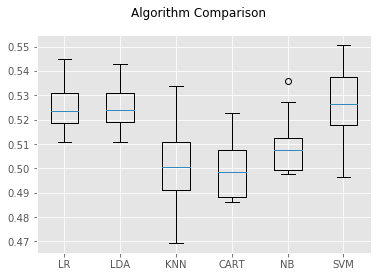

In [35]:
# Compare Algorithms

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
